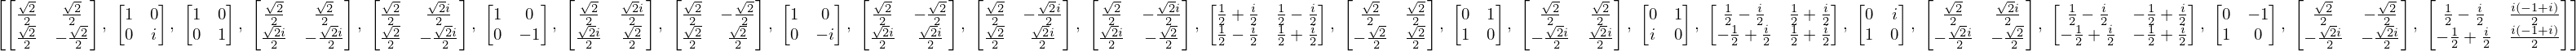

In [1]:
import sympy
import numpy as np

from collections import defaultdict
from itertools import product

M = sympy.Matrix
simplify = sympy.simplify
sqrt = sympy.sqrt
i = sympy.I
i_ = i

from sympy.physics.quantum import Dagger
from sympy.physics.quantum import tensorproduct

sympy.init_printing()
H = simplify(M([[1, 1], [1, -1]]) / sqrt(2))
S = M([[1, 0], [0, i]])
C_L = [H, S]
basis_vectors = [M([1, 0]), M([0, 1])]

def getitem(m, i, j):
    # Note that sympy uses an extremely weird way to store the matrices,
    # in particular the internal representation is vastly different from what
    # is printed. For instance the H matrix is stored as a Mul object
    # (even after using simplify) instead of a matrix. 
    # Therefore m[i][j] will NOT work. This is a workaround.
    return (Dagger(basis_vectors[i]) * m * basis_vectors[j])[0]

def is_known(C_L, a):
    for c in C_L:
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return True
    return False
for i in range(5):
    for m in (H, S):
        for c in C_L:
            c = simplify(c*m)
            if(is_known(C_L, c)):
                continue
            C_L.append(c)
C_L

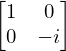

In [2]:
C_L[8]

In [2]:
from sympy import exp,pi, I as i

siZ = exp(i*pi/4)*Dagger(S)
smiX = simplify(M([[1, -i], [-i, 1]]) / sqrt(2))

In [3]:
def get_product_index(a):
    for i,c in enumerate(C_L):
        test = c * Dagger(a)
        if(simplify(getitem(test, 0, 1)) != 0):
            continue
        if(simplify(getitem(test, 0, 0) / getitem(test, 1, 1)) == 1):
            return i


In [10]:
get_product_index(siZ * siZ**3 * smiX**2)

In [5]:
get_product_index(siZ**2 * smiX**2 * siZ**3)

In [11]:
get_product_index(siZ**2 * smiX**2 * siZ**3 * siZ**2)